<div style="text-align: center;">
    <img src="https://media.licdn.com/dms/image/v2/D4E0BAQE4bCQaEBYDUQ/company-logo_200_200/company-logo_200_200/0/1728590235264/hobotacademy_logo?e=1738195200&v=beta&t=0DiMS1wnJYE6nkBjL237Lh3mTm8GKEy_s65hG_yiTSs" alt="Hobot Academy Logo" width="200"/>
</div>

<h1 style="text-align: center;">Math</h1>
<h2 style="text-align: center;">Session09</h2>
<h3 style="text-align: center;">Batch Gradient Descent - BGD, Stochastic Gradient Descent - SGD, Mini-Batch Gradient Descent - MBGD</h3>
<h3 style="text-align: center;">Zahra Amini</h3>

<div style="width: 100%; text-align: center;">
    <table style="margin: 0 auto;">
        <tr>
            <td>
                <a href="https://t.me/hobotacademy">Telegram</a><br>
                <a href="https://www.linkedin.com/company/hobotacademy">LinkedIn</a><br>
                <a href="https://www.youtube.com/@AcademyHobot">YouTube</a><br>
            </td>
            <td>
                <a href="https://github.com/hobotacademy">GitHub</a><br>
                <a href="https://www.kaggle.com/aminizahra">Kaggle</a><br>
                <a href="https://www.instagram.com/hobot.academy/">Instagram</a><br>
            </td>
        </t>
    </table>
</div>
    </table>
</div>
    </table>
</div>

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Cost function (Mean Squared Error - MSE)

In [1]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta) #theta0, theta1 (2, 1) x(m, 1) --> (m, 1) (2, 1) wx+b, theta1 x + theta0
    errors = predictions - y
    cost = (1/(2*m)) * np.sum(errors ** 2)
    return cost

## 1️⃣ Batch Gradient Descent (BGD)

In [2]:
def batch_gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = np.zeros(num_iters)

    for i in range(num_iters):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * gradients # thta -= alpha * gradients
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

## 2️⃣ Stochastic Gradient Descent (SGD)

In [3]:
def stochastic_gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = np.zeros(num_iters * m)

    for i in range(num_iters):
        for j in range(m):
            random_index = np.random.randint(m)  # Select a random sample
            X_sample = X[random_index:random_index+1]
            y_sample = y[random_index:random_index+1]
            gradients = X_sample.T.dot(X_sample.dot(theta) - y_sample)
            theta -= alpha * gradients
            cost_history[i * m + j] = compute_cost(X, y, theta)

    return theta, cost_history

## 3️⃣ Mini-Batch Gradient Descent (MBGD)

In [4]:
def mini_batch_gradient_descent(X, y, theta, alpha, num_iters, batch_size):
    m = len(y)
    cost_history = np.zeros(num_iters)

    for i in range(num_iters):
        indices = np.random.permutation(m)  # Shuffle the dataset
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, m, batch_size): # 0, 8, 16, 32, .., m
            X_mini = X_shuffled[j:j+batch_size]
            y_mini = y_shuffled[j:j+batch_size]
            gradients = (1 / batch_size) * X_mini.T.dot(X_mini.dot(theta) - y_mini)
            theta -= alpha * gradients
        
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

## Sample dataset

In [6]:
import numpy as np

In [7]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # y = 2x (without noise)

## Add a column of ones for the bias term (θ0)

In [8]:
X = np.c_[np.ones(len(X)), X]
X

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

## Initialize weights (theta)

In [9]:
theta = np.zeros(2)
theta

array([0., 0.])

## Algorithm settings

In [10]:
alpha = 0.01
num_iters = 1000
batch_size = 2

## Run different Gradient Descent methods

In [11]:
theta_bgd, cost_bgd = batch_gradient_descent(X, y, np.copy(theta), alpha, num_iters)
theta_sgd, cost_sgd = stochastic_gradient_descent(X, y, np.copy(theta), alpha, num_iters)
theta_mbgd, cost_mbgd = mini_batch_gradient_descent(X, y, np.copy(theta), alpha, num_iters, batch_size)

## Display results

In [12]:
print(f"🔵 Final θ values (BGD): {theta_bgd}")
print(f"🔵 Final cost (BGD): {cost_bgd[-1]}")

print(f"🟢 Final θ values (SGD): {theta_sgd}")
print(f"🟢 Final cost (SGD): {cost_sgd[-1]}")

print(f"🟣 Final θ values (MBGD): {theta_mbgd}")
print(f"🟣 Final cost (MBGD): {cost_mbgd[-1]}")

🔵 Final θ values (BGD): [0.09475322 1.97375488]
🔵 Final cost (BGD): 0.0008170921742813807
🟢 Final θ values (SGD): [7.47490730e-05 1.99997977e+00]
🟢 Final cost (SGD): 5.080765911955142e-10
🟣 Final θ values (MBGD): [0.006987   1.99807745]
🟣 Final cost (MBGD): 4.439608815932213e-06


In [14]:
import matplotlib.pyplot as plt

# Plot cost vs. iterations

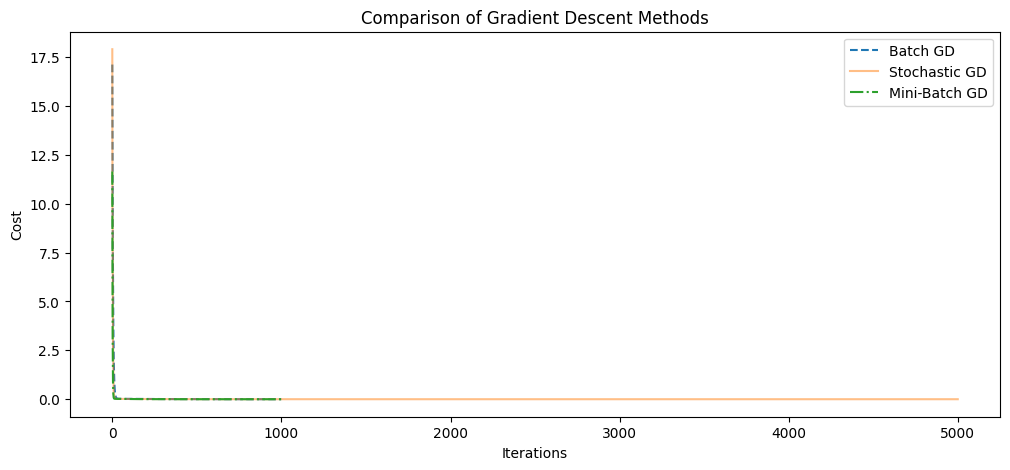

In [15]:
plt.figure(figsize=(12, 5))

plt.plot(range(num_iters), cost_bgd, label="Batch GD", linestyle="--")
plt.plot(range(num_iters * len(y)), cost_sgd[:num_iters * len(y)], label="Stochastic GD", alpha=0.5)
plt.plot(range(num_iters), cost_mbgd, label="Mini-Batch GD", linestyle="-.")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Comparison of Gradient Descent Methods")
plt.legend()
plt.show()

# Plot regression lines

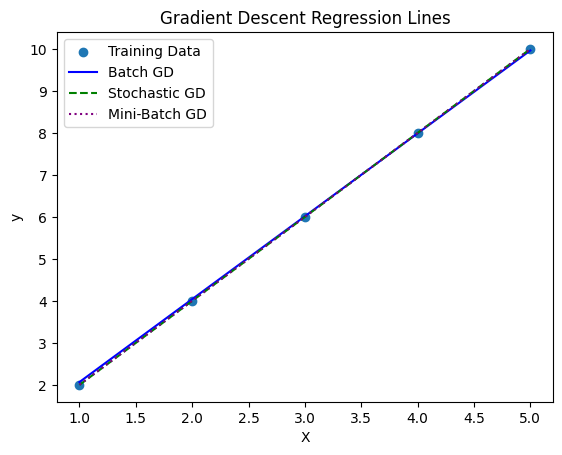

In [16]:
plt.scatter(X[:, 1], y, label="Training Data")
plt.plot(X[:, 1], X.dot(theta_bgd), color='blue', label="Batch GD")
plt.plot(X[:, 1], X.dot(theta_sgd), color='green', linestyle="dashed", label="Stochastic GD")
plt.plot(X[:, 1], X.dot(theta_mbgd), color='purple', linestyle="dotted", label="Mini-Batch GD")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Gradient Descent Regression Lines")
plt.legend()
plt.show()